## 加上每周数据
## 数据进行归一化
## 模型换成kaggle神器
## 要求：就是提升到前一百名

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

import gc
import time
import pickle
import seaborn as sns
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn import preprocessing 
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float16)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)

## 读入保存好的数据

In [2]:
data = pd.read_pickle('E:\\文件管理集合\\笔记\\机器学习\\深度之眼_Kaggle\\PredictFutureSales\\data2.pkl')
# data = data[[
#     'date_block_num', 
#     'shop_id', 
#     'item_id', 
#     'item_cnt_month',
    
# #     'shop_city', 
# #     'shop_name1',
# #     'shop_type', 
    
# #     'name_1', 
# #     'name_2', 
# #     'name_3',
    
# #     'item_type', 
# #     'item_subtype', 
# #     'item_category_id', 
    
# #     'item_cnt_month_lag_1',
# #     'item_cnt_month_lag_2', 
# #     'item_cnt_month_lag_3',
# #     'date_block_num_avg_item_cnt_lag_1',
# #     'date_block_num_and_item_id_avg_item_cnt_lag_1',
# #     'date_block_num_and_item_id_avg_item_cnt_lag_2',
# #     'date_block_num_and_item_id_avg_item_cnt_lag_3',
# #     'date_block_num_and_shop_id_avg_item_cnt_lag_1',
# #     'date_block_num_and_shop_id_avg_item_cnt_lag_2',
# #     'date_block_num_and_shop_id_avg_item_cnt_lag_3',
    
# #     'date_block_num_and_shop_city_avg_item_cnt_lag_1',
# #     'date_block_num_and_shop_name1_avg_item_cnt_lag_1',
# #     'date_block_num_and_shop_type_avg_item_cnt_lag_1',
    
# #     'date_block_num_and_item_category_id_avg_item_cnt_lag_1',
# #     'date_block_num_and_item_type_avg_item_cnt_lag_1',
# #     'date_block_num_and_item_subtype_avg_item_cnt_lag_1',
    
# #     'date_block_num_and_shop_id_and_item_id_avg_item_cnt_lag_1',
# #     'date_block_num_and_shop_id_and_name_1_avg_item_cnt_lag_1',
# #     'date_block_num_and_shop_id_and_name_2_avg_item_cnt_lag_1',
# #     'date_block_num_and_shop_id_and_name_3_avg_item_cnt_lag_1',
# #     'date_block_num_and_shop_id_and_item_category_id_avg_item_cnt_lag_1',
    
# #     'delta_price_lag', 
# #     'item_shop_last_sale', 
# #     'item_last_sale',
# #     'item_first_sale', 
# #     'year', 
# #     'month', 
# #     'days'
# ]]

print(data.shape)
data.head(3)

(7756739, 48)


,date_block_num,shop_id,item_id,item_cnt_month,shop_city,shop_name1,shop_type,item_category_id,name_1,name_2,name_3,item_type,item_subtype,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,date_block_num_avg_item_cnt_lag_1,date_block_num_and_item_id_avg_item_cnt_lag_1,date_block_num_and_item_id_avg_item_cnt_lag_2,date_block_num_and_item_id_avg_item_cnt_lag_3,date_block_num_and_shop_id_avg_item_cnt_lag_1,date_block_num_and_shop_id_avg_item_cnt_lag_2,date_block_num_and_shop_id_avg_item_cnt_lag_3,date_block_num_and_shop_city_avg_item_cnt_lag_1,date_block_num_and_shop_name1_avg_item_cnt_lag_1,date_block_num_and_shop_type_avg_item_cnt_lag_1,date_block_num_and_item_category_id_avg_item_cnt_lag_1,date_block_num_and_item_type_avg_item_cnt_lag_1,date_block_num_and_item_subtype_avg_item_cnt_lag_1,date_block_num_and_shop_id_and_item_id_avg_item_cnt_lag_1,date_block_num_and_shop_id_and_name_1_avg_item_cnt_lag_1,date_block_num_and_shop_id_and_name_2_avg_item_cnt_lag_1,date_block_num_and_shop_id_and_name_3_avg_item_cnt_lag_1,date_block_num_and_shop_id_and_item_category_id_avg_item_cnt_lag_1,delta_price_lag,item_shop_last_sale,item_last_sale,item_first_sale,year,month,days,week0,week1,week2,week3,week4,week5,week6
0,4,2,27,0.0,0,0,5,19,27,77,42,5,10,0.0,0.0,0.0,0.292969,0.027771,0.083313,0.083313,0.076233,0.095459,0.063599,0.076233,0.076233,0.29126,0.743652,0.616699,0.682129,0.0,0.0,0.564453,0.096985,0.500000,0.345459,1,1,4,2013,4,31,4,4,4,5,5,5,4
1,4,2,28,0.0,0,0,5,30,28,108,42,8,55,0.0,0.0,0.0,0.292969,0.111084,0.083313,0.194458,0.076233,0.095459,0.063599,0.076233,0.076233,0.29126,1.081055,1.048828,1.081055,0.0,0.0,0.347900,0.096985,0.399902,0.259521,-1,1,4,2013,4,31,4,4,4,5,5,5,4
2,4,2,29,0.0,0,0,5,23,29,124,42,5,16,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-1,4,4,2013,4,31,4,4,4,5,5,5,4


In [3]:
##求出每个月的均值销售额##shop_mean_months
a = []
for i in range(4,34):
    b = data[data.date_block_num==i]##取到每一个月
    c = b.sum()['item_cnt_month']#求和
    d = len(b.shop_id.unique())#长度（个数）
    a.append(c/d)#求得均值
print(a)

[2154.6486486486488, 2463.0, 2351.0810810810813, 2506.7297297297296, 2377.945945945946, 2258.7297297297296, 2416.7837837837837, 3432.815789473684, 2279.1052631578946, 2168.3684210526317, 2128.358974358974, 1720.1, 1770.275, 1814.35, 1673.4878048780488, 1881.8536585365853, 1645.6829268292684, 1702.439024390244, 1962.7560975609756, 2952.170731707317, 1940.0, 1661.2926829268292, 1621.9756097560976, 1397.8536585365853, 1351.9268292682927, 1354.3170731707316, 1371.439024390244, 1484.5853658536585, 1392.0731707317073, 1360.7380952380952]


In [4]:
len(a)

30

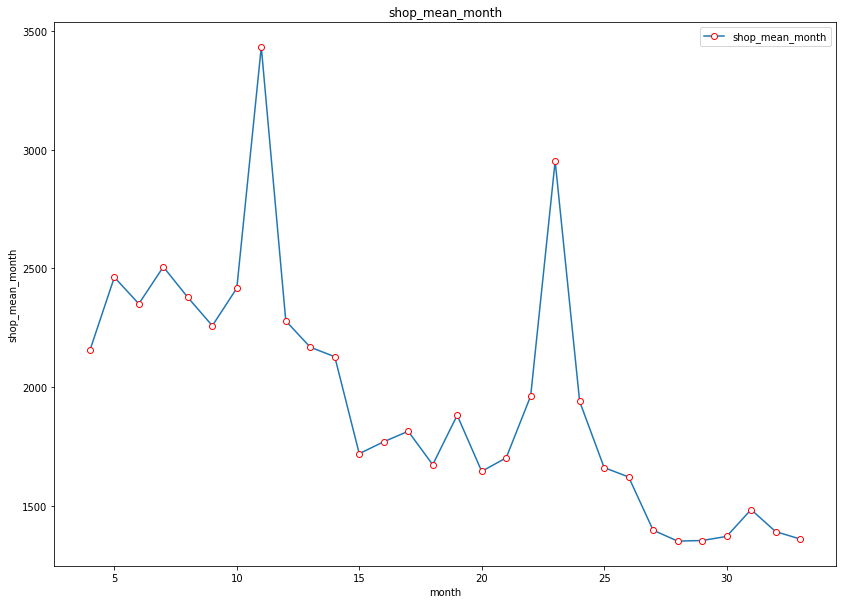

In [5]:
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文

# ax.plot(range(4,34), a, marker='o', mec='r', mfc='w',label='shop_mean_month')
# ax.legend()  # 让图例生效

plt.subplots(1,1,figsize=(14,10))
plt.plot(range(4,34), a, marker='o', mec='r', mfc='w',label='shop_mean_month')
plt.legend()  # 让图例生效
plt.xlabel('month') #X轴标签
plt.ylabel("shop_mean_month") #Y轴标签
plt.title("shop_mean_month") #标题

plt.show()

In [6]:
##添加周特征，周的每一天的特征
weekarr = []
t = 2
count = 0
for w in range(3):
    for i in [31,28,31,30,31,30,31,31,30,31,30,31]:
        a = [0,0,0,0,0,0,0,count]
        count+=1
        for j in range(i):
            a[t]+=1
            if t==6:
                t=-1
            t+=1
        weekarr.append(a)
weekarr = pd.DataFrame(np.vstack(weekarr), columns=['week0','week1','week2','week3','week4','week5','week6','date_block_num'])
data = pd.merge(data, weekarr, on=['date_block_num'], how='left')#加进去
del weekarr
gc.collect()

2532

In [7]:
##数据集的划分
X_zong = data.drop(['item_cnt_month'], axis=1)#去掉标签
Y_train = data[data.date_block_num < 33]['item_cnt_month']#训练集的标签
Y_valid = data[data.date_block_num == 33]['item_cnt_month']#交叉验证的标签
del data##删除数据集减少占用内存
gc.collect()##垃圾回收机制

7

In [10]:
X_zong.columns

Index(['date_block_num', 'shop_id', 'item_id', 'shop_city', 'shop_name1',
       'shop_type', 'item_category_id', 'name_1', 'name_2', 'name_3',
       'item_type', 'item_subtype', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'date_block_num_avg_item_cnt_lag_1',
       'date_block_num_and_item_id_avg_item_cnt_lag_1',
       'date_block_num_and_item_id_avg_item_cnt_lag_2',
       'date_block_num_and_item_id_avg_item_cnt_lag_3',
       'date_block_num_and_shop_id_avg_item_cnt_lag_1',
       'date_block_num_and_shop_id_avg_item_cnt_lag_2',
       'date_block_num_and_shop_id_avg_item_cnt_lag_3',
       'date_block_num_and_shop_city_avg_item_cnt_lag_1',
       'date_block_num_and_shop_name1_avg_item_cnt_lag_1',
       'date_block_num_and_shop_type_avg_item_cnt_lag_1',
       'date_block_num_and_item_category_id_avg_item_cnt_lag_1',
       'date_block_num_and_item_type_avg_item_cnt_lag_1',
       'date_block_num_and_item_subtype_avg_item_cnt_lag_1',
  

In [11]:
from sklearn.preprocessing import MinMaxScaler ##数据归一化
minMax = MinMaxScaler()    


X_zong_std = minMax.fit_transform(X_zong.iloc[:,:-7])  ##取所有的行，除了后七列的所有的
X_zong.iloc[:,:-7] = pd.DataFrame(np.vstack(X_zong_std),columns=X_zong.columns[:-7])
X_zong.iloc[:,:-7] = downcast_dtypes(X_zong.iloc[:,:-7])#转换数据类型，为了减少内存

##这就是排除出去的后七列
# X_zong['week0'] = X_zong['week0'].astype(np.int8)
# X_zong['week1'] = X_zong['week1'].astype(np.int8)
# X_zong['week2'] = X_zong['week2'].astype(np.int8)
# X_zong['week3'] = X_zong['week3'].astype(np.int8)
# X_zong['week4'] = X_zong['week4'].astype(np.int8)
# X_zong['week5'] = X_zong['week5'].astype(np.int8)
# X_zong['week6'] = X_zong['week6'].astype(np.int8)

del X_zong_std
gc.collect()

803

In [12]:
X_train = X_zong[X_zong.date_block_num < 0.96679688]
X_valid = X_zong[X_zong.date_block_num == 0.96679688]
X_test = X_zong[X_zong.date_block_num == 1]
del X_zong
gc.collect()

0

## 模型的训练--lightgbm、catboost ，集成（堆叠）

In [13]:
##参数可以自己改
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.9, 
    subsample=0.8, 
    eta=0.1,    
    seed=1)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

d:\python36\deeplearning\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
d:\python36\deeplearning\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:34:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:17] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:1.18754	validation_1-rmse:1.05314
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.13577	validation_1-rmse:1.00944
[2]	validation_0-rmse:1.09064	validation_1-rmse:0.972859
[3]	validation_0-rmse:1.05191	validation_1-rmse:0.941881
[4]	validation_0-rmse:1.02194	validation_1-rmse:0.919657
[5]	validation_0-rmse:0.993192	validation_1-rmse:0.896879
[6]	validation_0-rmse:0.968819	validation_1-rmse:0.878388
[7]	validation_0-rmse:0.948

4464.995383024216

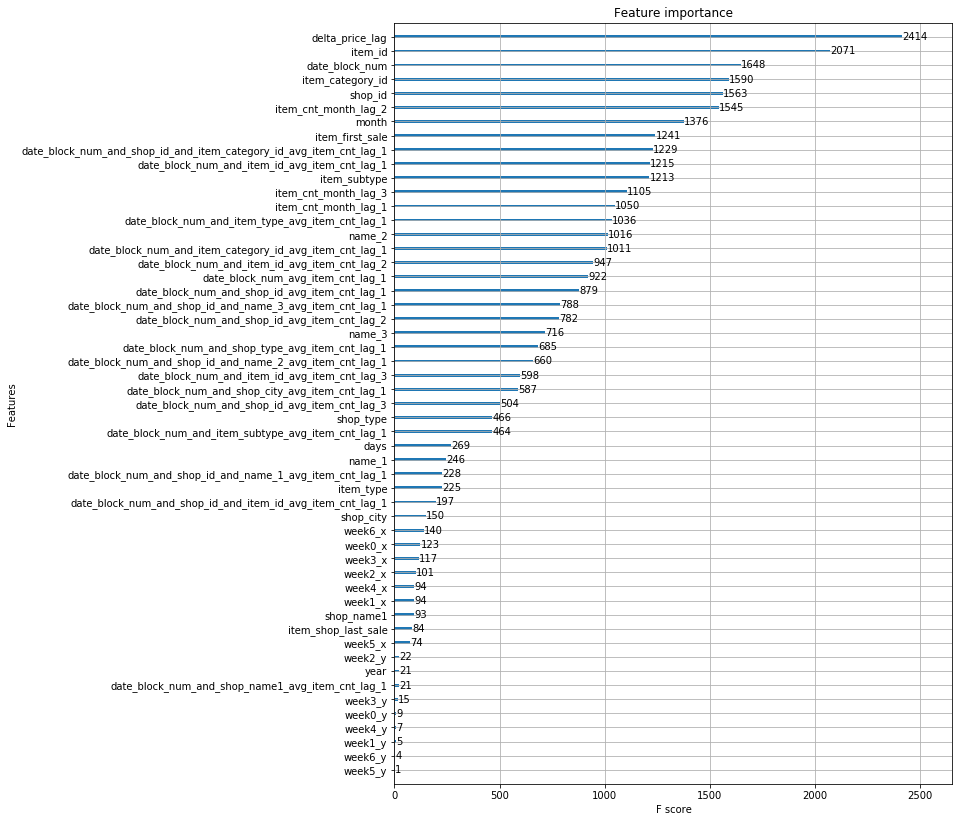

In [14]:
plot_features(model, (10,14))

## 保存为自己所需要的数据

In [15]:
Y_test = model.predict(X_test).clip(0, 20)##clip0-20之间
test = pd.read_csv('E:\\DL_datasets\\PredictFutureSales\\test.csv').set_index('ID')

submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('xgb_submission3.csv', index=False)

## 自己先查资料、了解地震波的原理，以及以报告的形式，写出地震比赛中的要求以及评估方式，自己可以去探索一下数据（EDA）。